# Projet d'étude de santé publique  
<br/>
<I>Food and Agriculture Organization of the United Nation <I>   

  
   <br/>  
<br/> 
    
> Valentin GARCIA 
    
<br/>


### Opérations préalables

In [1]:
# Importation des librairies utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# default='warn'
pd.options.mode.chained_assignment = None  

# Importation des 4 fichier csv pour création de 4 dataframe
aide = pd.read_csv(r'C:\Users\valen\OneDrive\Documents\Projet\0 - En cours\OpenClassrooms\Projet 4\0 - Données initiales\aide_alimentaire.csv')
dispo = pd.read_csv(r'C:\Users\valen\OneDrive\Documents\Projet\0 - En cours\OpenClassrooms\Projet 4\0 - Données initiales\dispo_alimentaire.csv')
population = pd.read_csv(r'C:\Users\valen\OneDrive\Documents\Projet\0 - En cours\OpenClassrooms\Projet 4\0 - Données initiales\population.csv')
nutrition = pd.read_csv(r'C:\Users\valen\OneDrive\Documents\Projet\0 - En cours\OpenClassrooms\Projet 4\0 - Données initiales\sous_nutrition.csv')



In [2]:
# Affichage de la taille des 4 dataframe créés
print("Taille tableau AIDE ALIMENTAIRE :", aide.shape)
print("Taille tableau DISPONIBILITE ALIMENTAIRE :", dispo.shape)
print("Taille tableau POPULATION :", population.shape)
print("Taille tableau SOUS NUTRITION :", nutrition.shape)

# utilisation commande 'info()'
print("\n Exemple infos sur dataframe AIDE :")
aide.info()

# Vérification type VALEUR dans nutrition
nutrition['Valeur'].unique()

Taille tableau AIDE ALIMENTAIRE : (1475, 4)
Taille tableau DISPONIBILITE ALIMENTAIRE : (15605, 18)
Taille tableau POPULATION : (1416, 3)
Taille tableau SOUS NUTRITION : (1218, 3)

 Exemple infos sur dataframe AIDE :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

<br/> 
<br/>


### Réponses aux questions de Marc
----------------------------------
<br/> 

**N°1 :** Proportion de personnes en état de sous-nutrition en 2017

La population mondiale en 2017 était de 7548134111 soit 7.55 Milliards de personnes
La population mondiale en état de sous-nutrition en 2017 était de 535700000 soit 0.54 Milliards de personnes
La proportion mondiale en état de sous-nutrition en 2017 était donc de 7.1 % 



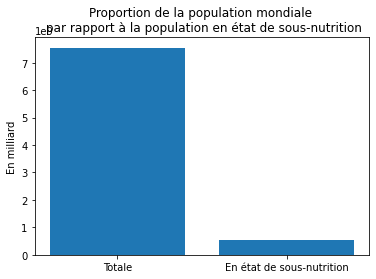

In [3]:
# Population Mondiale
population_2017 = round( population.loc[population['Année'] == 2017,:]['Valeur'].sum()*1000 )
print('La population mondiale en 2017 était de',population_2017, 'soit', round(population_2017 / 10**9,2), 'Milliards de personnes')


# Travail sur le DataFrame NUTRITION pour remplacer les valeur 'nan', '<0.1' et le type de la série VALEUR
nutrition.loc[nutrition.Valeur == '<0.1', 'Valeur'] = '0'
nutrition['Valeur'] = nutrition['Valeur'].replace(np.nan , 0).astype(float)


# Populaion en état de sous-nutrition
sous_nutrition_2017 = round( nutrition.loc[nutrition['Année'] == '2016-2018',:]['Valeur'].sum() * 10**6 )
print('La population mondiale en état de sous-nutrition en 2017 était de',sous_nutrition_2017, 'soit', round(sous_nutrition_2017 / 10**9,2), 'Milliards de personnes')


# Proportion de la populaion en état de sous-nutrition
proportion = round( (sous_nutrition_2017 / population_2017) * 100,2)
print('La proportion mondiale en état de sous-nutrition en 2017 était donc de',proportion,'% \n')

# Graphique
x = ['Totale', 'En état de sous-nutrition'] 
y = [population_2017, sous_nutrition_2017]  
plt.bar(x, y) 
plt.ylabel("En milliard")    
plt.title("Proportion de la population mondiale \n par rapport à la population en état de sous-nutrition") 
plt.show()


<br/>
<br/>

**N°2 :** Nombre théorique de personnes qui pourraient être nourries

In [4]:
# Définition du besoin en calorie en moyenne par ête humain
nb_kcal = 2500
print('Selon le site CIWF, il faudrait en moyenne',nb_kcal,'kcal par jour pour chaque être humain \n')


# Travail sur le DataFrame DISPO pour remplacer les valeur 'nan'
dispo['Disponibilité alimentaire (Kcal/personne/jour)'] = dispo['Disponibilité alimentaire (Kcal/personne/jour)'].replace(np.nan , 0).astype(float)


# Population par pays en 2017
population_pays = round(population.loc[population['Année'] == 2017,:] )
population_pays['Valeur'] = population_pays['Valeur'] * 1000


# Disponibilité alimentaire par pays par jour
dispo_alimentaire_pays = round(dispo.groupby(['Zone'], as_index = False)['Disponibilité alimentaire (Kcal/personne/jour)'].sum())


# Jointure de population_pays et de dispo_alimentaire_pays
population_aliment = pd.merge(population_pays , dispo_alimentaire_pays , on = 'Zone')


# Calcul disponibilité alimentaire mondiale par jour avec ajout d'une colonne dans population_aliment
population_aliment['dispo_alimentaire_mondiale'] = population_aliment['Valeur'] * population_aliment['Disponibilité alimentaire (Kcal/personne/jour)']
calcul_aliment1 = population_aliment['dispo_alimentaire_mondiale'].sum()
calcul_aliment2 = round(calcul_aliment1 / nb_kcal)
proportion_aliment1 = round((calcul_aliment2 - population_2017) / calcul_aliment2 *100, 2)


print('Le calcul est effectué sur la base de la population mondiale de 2017 (',round(population_2017 / 10**9,2),'milliards) \n')
print('Le calcul prend en compte la base de la disponibilité alimentaire de chaque pays, pour chaque jour et par personne \n')
print('En fonction de ces calculs, la somme des calories disponible au nouveau mondiale par jour est de', round(calcul_aliment1) , 'kcal \n')
print('Le nombre théorique de personne qui pourraient être nourries chaque jour est donc de',calcul_aliment2, 'soit', round(calcul_aliment2 / 10**9,2), 'Milliards de personnes')

if proportion_aliment1 > 0:
    print('    =>    ce qui correspondent à un surplus de production de',proportion_aliment1,'% par rapport aux besoins de la population mondiale')
else :
    print('    =>    ce qui correspondent à un déficit de production de', - proportion_aliment1,'% par rapport aux besoins de la population mondiale')


Selon le site CIWF, il faudrait en moyenne 2500 kcal par jour pour chaque être humain 

Le calcul est effectué sur la base de la population mondiale de 2017 ( 7.55 milliards) 

Le calcul prend en compte la base de la disponibilité alimentaire de chaque pays, pour chaque jour et par personne 

En fonction de ces calculs, la somme des calories disponible au nouveau mondiale par jour est de 20918969060000 kcal 

Le nombre théorique de personne qui pourraient être nourries chaque jour est donc de 8367587624 soit 8.37 Milliards de personnes
    =>    ce qui correspondent à un surplus de production de 9.79 % par rapport aux besoins de la population mondiale


<br/>
<br/>

**N°3 :** Disponibilité alimentaire des produits végétaux

In [5]:
# Disponibilité alimentaire des produits végétaux par pays par jour
dispo_alimentaire_vegetaux_pays = dispo.loc[dispo['Origine'] == 'vegetale',:] 
dispo_alimentaire_vegetaux_pays = round(dispo_alimentaire_vegetaux_pays.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum())


# Jointure de population_pays et de dispo_alimentaire_vegetaux_pays
population_aliment_vegetaux = pd.merge(population_pays , dispo_alimentaire_vegetaux_pays , on = 'Zone')


# Calcul disponibilité alimentaire mondiale par jour avec ajout d'une colonne dans population_aliment
population_aliment_vegetaux['dispo_alimentaire_vegetaux'] = population_aliment_vegetaux['Valeur'] * population_aliment_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)']
calcul_aliment3 = population_aliment_vegetaux['dispo_alimentaire_vegetaux'].sum()
calcul_aliment4 = round(calcul_aliment3 / nb_kcal)
proportion_aliment2 = round((calcul_aliment4 - population_2017) / calcul_aliment4 *100, 2)


print('En suivant la même méthode de calcul que précédement : \n')
print('La somme des calories disponible au nouveau mondiale des produits végétaux par jour est de', round(calcul_aliment3) , 'kcal \n')
print('Donc, le nombre théorique de personne qui pourraient être nourries chaque jour est de',calcul_aliment4, 'soit', round(calcul_aliment4 / 10**9,2), 'Milliards de personnes')

if proportion_aliment2 > 0:
    print('    =>    ce qui correspondent à un surplus de production de',proportion_aliment2,'% par rapport aux besoins de la population mondiale')
else :
    print('    =>    ce qui correspondent à un déficit de production de', - proportion_aliment2,'% par rapport aux besoins de la population mondiale')
    

En suivant la même méthode de calcul que précédement : 

La somme des calories disponible au nouveau mondiale des produits végétaux par jour est de 17260751291000 kcal 

Donc, le nombre théorique de personne qui pourraient être nourries chaque jour est de 6904300516 soit 6.9 Milliards de personnes
    =>    ce qui correspondent à un déficit de production de 9.33 % par rapport aux besoins de la population mondiale


<br>
<br>

**N°4 :** L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine

In [6]:
# Travail sur dataframe dispo
dispo.iloc[ : , 3::] = dispo.iloc[ : , 3::].replace(np.nan , 0).astype(int)


# Calculs
dispo_interieur = dispo['Disponibilité intérieure'].sum()
nourriture_humain = dispo['Nourriture'].sum()
nourriture_perte = dispo['Pertes'].sum()
nourriture_animaux = dispo['Aliments pour animaux'].sum()


print('Le calcul pour l\'utilisation de la disponibilité intérieur d\'un pays est le suivant :')
print('    Disponibilité intérieure')
print('    =  Production + Importations - Exportations + Variation de stock') 
print('    =  Alimentation humaine + Alimentation animal + Utilisation autre + Perte + Semence \n')


print('La disponibilité intérieur d\'un pays est répartie en moyenne comme suit :')
print('    =>', round(nourriture_humain / dispo_interieur *100,2),'% pour l\'alimentaion humain')
print('    =>', round(nourriture_animaux / dispo_interieur *100,2),'% pour l\'alimentaion des animaux')
print('    =>', round(nourriture_perte / dispo_interieur *100,2),'% de perte')


Le calcul pour l'utilisation de la disponibilité intérieur d'un pays est le suivant :
    Disponibilité intérieure
    =  Production + Importations - Exportations + Variation de stock
    =  Alimentation humaine + Alimentation animal + Utilisation autre + Perte + Semence 

La disponibilité intérieur d'un pays est répartie en moyenne comme suit :
    => 49.51 % pour l'alimentaion humain
    => 13.24 % pour l'alimentaion des animaux
    => 4.61 % de perte


<br/> 


### Réponses aux questions de Julien
----------------------------------
<br/> 

#### Liste des céréales selon le site de la FAO

In [7]:
# Etude de la dataframe dispo sur la série produit
dispo['Produit'].unique()


array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [8]:
# création d'un csv depuis un téléchargement sur le site de la FAO

# importation du fichier
liste_cereales = pd.read_csv(r'C:\Users\valen\OneDrive\Documents\Projet\0 - En cours\OpenClassrooms\Projet 4\0 - Données initiales\cereales.csv')

# Jointure céréales avec dispo alimentaire
cereales = pd.merge(dispo , liste_cereales , on = 'Produit')

print('La liste des céréales retenue pour le projet est la suivante : \n')
print(cereales['Produit'].unique()) 

La liste des céréales retenue pour le projet est la suivante : 

['Blé' 'Céréales, Autres' 'Maïs' 'Millet' 'Orge' 'Avoine' 'Seigle'
 'Sorgho']


<br>

**N°1 :** Utilisation des céréales : répartition entre l’alimentation humaine et l’alimentation pour animaux

In [9]:
# Travail sur la série Aliments pour animaux de la dataframe cereales
cereales['Aliments pour animaux'] = cereales['Aliments pour animaux'].replace(np.nan , 0).astype(float)

# Calculs sommes
cereales_animaux = cereales['Aliments pour animaux'].sum().astype(int)
cereales_homme = cereales['Nourriture'].sum().astype(int)


# Calculs 
cereales_repartition_animaux =  round(cereales_animaux / (cereales_animaux + cereales_homme) * 100 ,2)
cereales_repartition_homme =  round(cereales_homme / (cereales_animaux + cereales_homme) * 100 ,2)

print('Les céréales prévues pour l\'alimentation des animaux représentent',cereales_animaux,'milliers de tonnes')
print('Les céréales prévues pour l\'alimentation des Hommes représentent',cereales_homme,'milliers de tonnes \n')
print('    -> Soit',cereales_repartition_animaux,'% pour les animaux')
print('    -> et',cereales_repartition_homme,'% pour les humains \n')


Les céréales prévues pour l'alimentation des animaux représentent 839941 milliers de tonnes
Les céréales prévues pour l'alimentation des Hommes représentent 651724 milliers de tonnes 

    -> Soit 56.31 % pour les animaux
    -> et 43.69 % pour les humains 



<br>

**N°2 :** Etude du manioc en Thaïlande (aux égards de la proportion de personnes en sous-nutrition)

In [10]:
# Recherche informations et calculs
population_thailande_2017 = round(population.loc[(population['Année'] == 2017) & (population['Zone'] == 'Thaïlande'),'Valeur'] * 1000).astype(int).item()
sous_nutrition_thailande_2017 = round( nutrition.loc[(nutrition['Année'] == '2016-2018') & (nutrition['Zone'] == 'Thaïlande'),'Valeur'].item() * 10**6 )
proportion_thailande_nutrition = round(sous_nutrition_thailande_2017 / population_thailande_2017 * 100,2)

# Créations des variables pour calculs
production_manioc_thailande = (dispo.loc[(dispo['Zone'] == 'Thaïlande') & (dispo['Produit'] == 'Manioc'),'Production'].item())
exportation_manioc_thailande = (dispo.loc[(dispo['Zone'] == 'Thaïlande') & (dispo['Produit'] == 'Manioc'),'Exportations - Quantité'].item())
nourriture_manioc_thailande = (dispo.loc[(dispo['Zone'] == 'Thaïlande') & (dispo['Produit'] == 'Manioc'),'Nourriture'].item())
animaux_manioc_thailande = (dispo.loc[(dispo['Zone'] == 'Thaïlande') & (dispo['Produit'] == 'Manioc'),'Aliments pour animaux'].item())
importation_manioc_thailande = (dispo.loc[(dispo['Zone'] == 'Thaïlande') & (dispo['Produit'] == 'Manioc'),'Importations - Quantité'].item())
perte_manioc_thailande = (dispo.loc[(dispo['Zone'] == 'Thaïlande') & (dispo['Produit'] == 'Manioc'),'Pertes'].item())
dispo_intérieur_thailande = (dispo.loc[(dispo['Zone'] == 'Thaïlande') & (dispo['Produit'] == 'Manioc'),'Disponibilité intérieure'].item())
autre_manion_thailande = (dispo.loc[(dispo['Zone'] == 'Thaïlande') & (dispo['Produit'] == 'Manioc'),'Autres Utilisations'].item())

resul = []

for test in ['Production','Exportations - Quantité'] :
    resul.append(dispo.loc[(dispo['Zone'] == 'Thaïlande') & (dispo['Produit'] == 'Manioc'),test].item())







proportion_exportation_manioc_thailande = round(exportation_manioc_thailande / production_manioc_thailande * 100 ,2)
exportation_manioc = (production_manioc_thailande - exportation_manioc_thailande) * 10**6

# Manioc fixé à 1400 kcal / kg selon information internet
manioc_kcal = 1400

possibilite_nourriture_manioc = round((exportation_manioc * manioc_kcal) / (nb_kcal*365) / 10**6,2)


print('Pour mémoire, la population Thaïlandaise en 2017 était de :',round(population_thailande_2017 / 10**6,2),'millions')
print('    -> et la population Thaïlandaise en état de sous-nutrition était éstimée à :',round(sous_nutrition_thailande_2017 / 10**6,2),'millions')
print('    -> soit', proportion_thailande_nutrition, '% de la population en sous-nutrition\n')

print('Données sur le manioc en Thaïlande :')
print('    Disponibilité intérieur =',dispo_intérieur_thailande,'milliers de tonnes en 2017 \n')
print('    -> ce qui correspond bien à Procution (',production_manioc_thailande,')')
print('                                + Importaion (',importation_manioc_thailande,')')
print('                                - Exportation (',exportation_manioc_thailande,')')
print('                                + Variation de stock ( 0 ) \n')
#print(production_manioc_thailande + importation_manioc_thailande - exportation_manioc_thailande)      
print('    -> et qui correspond également à Nourriture humaine (',nourriture_manioc_thailande,')')      
print('                                     + Alimentation animale (',animaux_manioc_thailande,')')
print('                                     + utilisation autre (',autre_manion_thailande,')')
print('                                     + perte (',perte_manioc_thailande,')')
print('                                     + semence ( 0 ) \n')
#print(nourriture_manioc_thailande + animaux_manioc_thailande + autre_manion_thailande + perte_manioc_thailande)

print('=> Il y a donc',proportion_exportation_manioc_thailande,'% du manioc produit dans le pays qui est exporté à l\'étranger')
print('=> soit', exportation_manioc,'kg par an')
print('=> en sachant que 1 kg de manioc représente ~',manioc_kcal,'kcal et que le besoins journalier moyen par Homme est de',nb_kcal,'kcal')
print('=> l\'exportation de Manioc pourrait, en theorie, nourrire',possibilite_nourriture_manioc,'millions de personnes par an')
print('=> soit la totalité des personnes en sous-nutrition +',round((possibilite_nourriture_manioc) - (sous_nutrition_thailande_2017 / 10**6),2),'millions de personnes par an')


Pour mémoire, la population Thaïlandaise en 2017 était de : 69.21 millions
    -> et la population Thaïlandaise en état de sous-nutrition était éstimée à : 6.2 millions
    -> soit 8.96 % de la population en sous-nutrition

Données sur le manioc en Thaïlande :
    Disponibilité intérieur = 6264 milliers de tonnes en 2017 

    -> ce qui correspond bien à Procution ( 30228 )
                                + Importaion ( 1250 )
                                - Exportation ( 25214 )
                                + Variation de stock ( 0 ) 

    -> et qui correspond également à Nourriture humaine ( 871 )
                                     + Alimentation animale ( 1800 )
                                     + utilisation autre ( 2081 )
                                     + perte ( 1511 )
                                     + semence ( 0 ) 

=> Il y a donc 83.41 % du manioc produit dans le pays qui est exporté à l'étranger
=> soit 5014000000 kg par an
=> en sachant que 1 kg de manioc

<br/> 


### Réponses aux questions de Mélanie
----------------------------------
<br/> 

**N°1 :** Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [11]:
# Populaion en état de sous-nutrition
etat_sous_nutrition_2017 = nutrition.loc[nutrition['Année'] == '2016-2018',:] 
etat_sous_nutrition_2017.loc[:,'Valeur'] *=10**6


# Jointure de population_pays et de etat_sous_nutrition
etat_aliment_2017 = pd.merge(population_pays , etat_sous_nutrition_2017 , on = 'Zone')


# Présentation df
etat_aliment_2017.drop(columns = ['Année_x' , 'Année_y'], inplace = True)
etat_aliment_2017.columns = ['Pays' , 'Population du pays', 'Population en sous-nutrition']
etat_aliment_2017['Population du pays'] = etat_aliment_2017['Population du pays'].astype(int)
etat_aliment_2017['Population en sous-nutrition'] = etat_aliment_2017['Population en sous-nutrition'].astype(int)


# Rajout colonne proportion
etat_aliment_2017['Proportion en %'] = round(etat_aliment_2017['Population en sous-nutrition'] / etat_aliment_2017['Population du pays'] * 100,2)


# Tri des valeurs
etat_aliment_2017 = etat_aliment_2017.sort_values('Proportion en %', ascending = False)


print('Les 10 pays les plus touchés par la sous-nutrition sont les suivants : \n')
etat_aliment_2017.head(10)


Les 10 pays les plus touchés par la sous-nutrition sont les suivants : 



,Pays,Population du pays,Population en sous-nutrition,Proportion en %
78,Haïti,10982000,5300000,48.26
157,République populaire démocratique de Corée,25430000,12000000,47.19
108,Madagascar,25571000,10500000,41.06
103,Libéria,4702000,1800000,38.28
100,Lesotho,2092000,800000,38.24
183,Tchad,15017000,5700000,37.96
161,Rwanda,11981000,4200000,35.06
121,Mozambique,28649000,9400000,32.81
186,Timor-Leste,1243000,400000,32.18
0,Afghanistan,36296000,10500000,28.93


<br>
<br>

**N°2 :** Pays qui ont le plus bénéficié d’aide depuis 2013

In [12]:
# Changement nom colonne du dataframe avant jointure
aide.rename(columns = {'Pays bénéficiaire' : 'Zone'}, inplace = True)


# Population par pays en 2016
population_pays_2016 = round(population.loc[population['Année'] == 2016,:] )
population_pays_2016['Valeur'] = population_pays_2016['Valeur'] * 1000


# GroupBy
aide_alimentaire_pays = aide.groupby(['Zone'], as_index = False)['Valeur'].sum()


# Creation dataframe pour calcul aide en kg par habitant par jointure
aide_alimentaire = pd.merge(population_pays_2016 , aide_alimentaire_pays, on = 'Zone')
aide_alimentaire.drop(columns = ['Année'], inplace = True)


# Tri aide alimentaire par pays
aide_alimentaire = aide_alimentaire.sort_values('Valeur_y', ascending = False)


# Calcul colonnes
aide_alimentaire['Valeur2'] = aide_alimentaire['Valeur_y'] * 1000
aide_alimentaire['Valeur_x'] = aide_alimentaire['Valeur_x'].astype(int)
aide_alimentaire['Valeur3'] = round(aide_alimentaire['Valeur2'] / aide_alimentaire['Valeur_x']).astype(int)


# Autres calculs
somme_total_aliment = aide_alimentaire['Valeur_y'].sum()
somme_10pays_aliment = aide_alimentaire.iloc[:10 , 2 ].sum()
proportion_aide_mondiale = round(somme_10pays_aliment / somme_total_aliment * 100,2)


# Changement nom de colonne pour présentation df
aide_alimentaire.columns = ['Pays' , 'Population', 'Aide alimentaire en tonnes', 'Aide alimentaire en kg', 'Aide alimentaire kg par habitant']


print('La calcul est effectué sur les années 2013, 2014, 2015 et 2016 => pas de données pour l\'année 2017 et suivantes \n ')
print('Les 10 pays qui ont bénéficié d\'aide alimentaire durant cette période sont les suivants :')
print('    => en sachant que le total de l\'aide alimentaire a été de', somme_total_aliment, 'tonnes')
print('    => l\'aide alimentaire pour ces 10 pays a été estimé à', somme_10pays_aliment, 'tonnes')
print('    => ce qui correspond à', proportion_aide_mondiale,'% de l\'aide totale mondiale pour ces 10 pays durant cette période \n' )

aide_alimentaire.head(10)


La calcul est effectué sur les années 2013, 2014, 2015 et 2016 => pas de données pour l'année 2017 et suivantes 
 
Les 10 pays qui ont bénéficié d'aide alimentaire durant cette période sont les suivants :
    => en sachant que le total de l'aide alimentaire a été de 11020373 tonnes
    => l'aide alimentaire pour ces 10 pays a été estimé à 7570301 tonnes
    => ce qui correspond à 68.69 % de l'aide totale mondiale pour ces 10 pays durant cette période 



,Pays,Population,Aide alimentaire en tonnes,Aide alimentaire en kg,Aide alimentaire kg par habitant
52,République arabe syrienne,17466000,1858943,1858943000,106
21,Éthiopie,103603000,1381294,1381294000,13
72,Yémen,27168000,1206484,1206484000,44
65,Soudan du Sud,10833000,695248,695248000,64
64,Soudan,39847000,669784,669784000,17
33,Kenya,49052000,552836,552836000,11
3,Bangladesh,157977000,348188,348188000,2
63,Somalie,14186000,292678,292678000,21
54,République démocratique du Congo,78789000,288502,288502000,4
47,Niger,20789000,276344,276344000,13


<br>
<br>

**N°3 :** Pays ayant le plus de disponibilité alimentaire par habitant

In [13]:
# Utilisation de la dataframe 'dispo_alimentaire_pays' déjà créer précédement ainsi qu'une variable
pays_max_dispo_alimentaire = dispo_alimentaire_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = False)
pays_max_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] = pays_max_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].astype(int)


# Autres calcul
nombre_pays = pays_max_dispo_alimentaire['Zone'].count()
nombre_pays_sup = pays_max_dispo_alimentaire.loc[pays_max_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] >= nb_kcal , :]['Zone'].count()


pays_max_dispo_alimentaire.columns = ['Pays', 'Disponibilité alimentaire (Kcal/personne/jour)']


print('Les 10 pays ayant le plus de disponibilité alimentaire sont les suivants :')
print('    => Pour rappel, il faudrait',nb_kcal , 'kcal par jour pour chaque être humain' )
print('    => On trouve',nombre_pays_sup ,'pays (sur les',nombre_pays,'au total) ayant une disponibilité alimentaire supérieur ou égale à ce chiffre \n')

pays_max_dispo_alimentaire.head(10)


Les 10 pays ayant le plus de disponibilité alimentaire sont les suivants :
    => Pour rappel, il faudrait 2500 kcal par jour pour chaque être humain
    => On trouve 132 pays (sur les 174 au total) ayant une disponibilité alimentaire supérieur ou égale à ce chiffre 



,Pays,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770
16,Belgique,3737
159,Turquie,3708
171,États-Unis d'Amérique,3682
74,Israël,3610
72,Irlande,3602
75,Italie,3578
89,Luxembourg,3540
168,Égypte,3518
4,Allemagne,3503


<br>
<br>

**N°3 bis :** Pays ayant le moins de disponibilité alimentaire par habitant

In [14]:
pays_min_dispo_alimentaire = dispo_alimentaire_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = True)
pays_min_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] = pays_max_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].astype(int)

# Autres calcul
nombre_pays_inf = pays_max_dispo_alimentaire.loc[pays_max_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] < nb_kcal , :]['Pays'].count()


pays_min_dispo_alimentaire.columns = ['Pays', 'Disponibilité alimentaire (Kcal/personne/jour)']


print('Les 10 pays ayant le moins de disponibilité alimentaire sont les suivants :')
print('    => Pour rappel, il faudrait',nb_kcal , 'kcal par jour pour chaque être humain' )
print('    => On trouve',nombre_pays_inf ,'pays (sur les',nombre_pays,'au total) ayant une disponibilité alimentaire inférieur à ce chiffre \n')

pays_min_dispo_alimentaire.head(10)


Les 10 pays ayant le moins de disponibilité alimentaire sont les suivants :
    => Pour rappel, il faudrait 2500 kcal par jour pour chaque être humain
    => On trouve 42 pays (sur les 174 au total) ayant une disponibilité alimentaire inférieur à ce chiffre 



,Pays,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879
166,Zambie,1924
91,Madagascar,2056
0,Afghanistan,2087
65,Haïti,2089
133,République populaire démocratique de Corée,2093
151,Tchad,2109
167,Zimbabwe,2113
114,Ouganda,2126
154,Timor-Leste,2129
